# Imports

In [1]:
import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

warnings.filterwarnings('ignore')

# Constant

In [2]:
ARIMA_PREDICTIONS = "/kaggle/input/weather-underground/ARIMA_Forecasts_Datetime.csv"
GM_PREDICTIONS = "/kaggle/input/weather-underground/GM_Forecasts.csv"

# Code

In [3]:
df_arima_predictions = pd.read_csv(ARIMA_PREDICTIONS)
df_gm_predictions = pd.read_csv(GM_PREDICTIONS)

In [4]:
df_arima_predictions = df_arima_predictions.rename(columns={'Forecasts': 'ARIMA_Forecast'})
df_arima_predictions.head(3)

,Index,ARIMA_Forecast
0,8321,-0.487280
1,8322,-0.318901
2,8323,-0.252342


In [5]:
df_gm_predictions = df_gm_predictions.rename(columns={'Forecasts': 'GM_Forecast', 'Actual': 'Temp_Diff'})
df_gm_predictions['Datetime'] = pd.to_datetime(df_gm_predictions['Datetime'])
df_gm_predictions.head(3)

,Index,Datetime,Temp_Diff,GM_Forecast
0,8321,2024-05-25 00:30:00,0.0,25.905326
1,8322,2024-05-25 01:00:00,0.0,25.907901
2,8323,2024-05-25 01:30:00,0.0,25.910475


In [6]:
df_merged_forecasts = pd.merge(df_arima_predictions, df_gm_predictions, on=['Index'], how='inner')
df_merged_forecasts = df_merged_forecasts[['Index', 'Datetime', 'Temp_Diff', 'ARIMA_Forecast', 'GM_Forecast']]
df_merged_forecasts

,Index,Datetime,Temp_Diff,ARIMA_Forecast,GM_Forecast
0,8321,2024-05-25 00:30:00,0.0,-0.487280,25.905326
1,8322,2024-05-25 01:00:00,0.0,-0.318901,25.907901
2,8323,2024-05-25 01:30:00,0.0,-0.252342,25.910475
3,8324,2024-05-25 02:00:00,0.0,-0.163692,25.907215
4,8325,2024-05-25 02:30:00,0.0,-0.060384,25.909787
...,...,...,...,...,...
329,8651,2024-05-31 21:30:00,0.0,-0.545684,27.669459
330,8652,2024-05-31 22:00:00,0.0,-0.519263,27.672173
331,8653,2024-05-31 22:30:00,0.0,-0.392363,27.674887
332,8654,2024-05-31 23:00:00,-2.0,-0.377810,27.671237


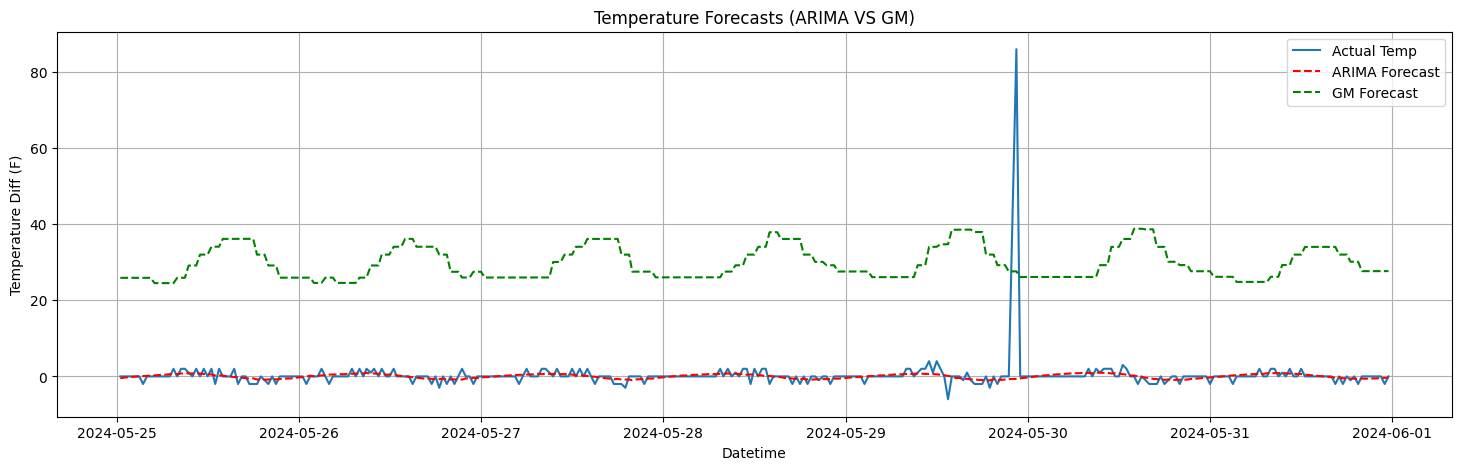

In [7]:
# Plotting
plt.figure(figsize=(18, 5))

plt.plot(df_merged_forecasts['Datetime'], df_merged_forecasts['Temp_Diff'], label='Actual Temp')
plt.plot(df_merged_forecasts['Datetime'], df_merged_forecasts['ARIMA_Forecast'], label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(df_merged_forecasts['Datetime'], df_merged_forecasts['GM_Forecast'], label='GM Forecast', linestyle='--', color='green')

plt.xlabel('Datetime')
plt.ylabel('Temperature Diff (F)')
plt.title('Temperature Forecasts (ARIMA VS GM)')
plt.legend()
plt.grid(True)
plt.show()

## MSE Comparison

In [8]:
mse_arima = ((df_merged_forecasts['Temp_Diff'] - df_merged_forecasts['ARIMA_Forecast']) ** 2).mean()
mse_gm = ((df_merged_forecasts['Temp_Diff'] - df_merged_forecasts['GM_Forecast']) ** 2).mean()

print(f'MSE ARIMA: {mse_arima} VS MSE GM: {mse_gm}')

MSE ARIMA: 23.54000157443077 VS MSE GM: 907.9506190836173


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            background-color: #f4f4f9;
            color: #333;
            margin: 0;
            padding: 20px;
        }
        .container {
            max-width: 800px;
            margin: auto;
            background: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            text-align: center;
            color: #0056b3;
        }
        .conclusion {
            margin-top: 20px;
        }
        .conclusion h2 {
            color: #0056b3;
        }
        .conclusion p {
            margin-bottom: 10px;
        }
        .highlight {
            color: #e74c3c;
            font-weight: bold;
        }
        .note {
            background-color: #fffbcc;
            padding: 10px;
            border-left: 5px solid #f1c40f;
            margin-top: 20px;
        }
    </style>
    <title>Model Assessment Conclusion</title>
</head>
<body>
    <div class="container">
        <h1>Model Assessment Conclusion</h1>
        <div class="conclusion">
            <h2>Observations and Insights</h2>
            <p>The Mean Squared Error (MSE) is a measure of the average squared difference between the observed actual outcomes and the predictions provided by a model. In this assessment, we compared the performance of two forecasting models: ARIMA and GM.</p>
            <p>The MSE for the <span class="highlight">ARIMA</span> model is <span class="highlight">23.54</span>, while the MSE for the <span class="highlight">GM</span> model is significantly higher at <span class="highlight">907.95</span>.</p>
            <h2>Conclusion</h2>
            <p>Based on the MSE values, it is evident that the ARIMA model performs considerably better than the GM model. The lower MSE indicates that the ARIMA model's predictions are much closer to the actual observed values compared to the GM model.</p>
            <h2>Concerns</h2>
            <p>There are some concerns regarding the performance of the GM model:</p>
            <ul>
                <li>The high MSE value of the GM model suggests that its predictions are highly inaccurate, leading to potential issues if used in a real-world application.</li>
                <li>The large discrepancy between the MSE values of the ARIMA and GM models highlights a need for further investigation into the reasons behind the poor performance of the GM model.</li>
            </ul>
            <div class="note">
                <strong>Note:</strong> It is crucial to continually validate and test forecasting models with new data to ensure their reliability and accuracy over time.
            </div>
        </div>
    </div>
</body>
</html>
